In [1]:
import pandas as pd
import numpy as np

In [2]:
import re
import nltk.corpus as stopwords

In [3]:
from nltk.stem import PorterStemmer

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.metrics import accuracy_score

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import plotly as py

In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
column=['id','label','text','subject','speaker','speaker job title','state info','party offiliation','barely true','false','half true','mostly true','pants on fire','context']

In [11]:
train = pd.read_csv('C:\\Users\\imagicahealth\\fakenews\\lair\\train.tsv', sep='\t',header=None,names=column)
test = pd.read_csv('C:\\Users\\imagicahealth\\fakenews\\lair\\test.tsv', sep='\t',header=None,names=column)
valid = pd.read_csv('C:\\Users\\imagicahealth\\fakenews\\lair\\valid.tsv', sep='\t',header=None,names=column)

In [12]:
train.head(1)

,id,label,text,subject,speaker,speaker job title,state info,party offiliation,barely true,false,half true,mostly true,pants on fire,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer


In [13]:
test.head(1)

,id,label,text,subject,speaker,speaker job title,state info,party offiliation,barely true,false,half true,mostly true,pants on fire,context
0,11972.json,true,Building a wall on the U.S.-Mexico border will...,immigration,rick-perry,Governor,Texas,republican,30,30,42,23,18,Radio interview


In [14]:
valid.head(1)

,id,label,text,subject,speaker,speaker job title,state info,party offiliation,barely true,false,half true,mostly true,pants on fire,context
0,12134.json,barely-true,We have less Americans working now than in the...,"economy,jobs",vicky-hartzler,U.S. Representative,Missouri,republican,1,0,1,0,0,an interview with ABC17 News


In [15]:
train.shape,test.shape,valid.shape

((10240, 14), (1267, 14), (1284, 14))

In [16]:
data=pd.concat([train,test,valid])

In [17]:
df=data.drop(columns=['id'])

In [18]:
df.head(1)

,label,text,subject,speaker,speaker job title,state info,party offiliation,barely true,false,half true,mostly true,pants on fire,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer


In [19]:
df.isnull().sum()

label                   0
text                    0
subject                 2
speaker                 2
speaker job title    3567
state info           2749
party offiliation       2
barely true             2
false                   2
half true               2
mostly true             2
pants on fire           2
context               131
dtype: int64

In [20]:
df.isnull().sum().sum()

6463

In [21]:
df=df.dropna()

In [22]:
df.isnull().sum()

label                0
text                 0
subject              0
speaker              0
speaker job title    0
state info           0
party offiliation    0
barely true          0
false                0
half true            0
mostly true          0
pants on fire        0
context              0
dtype: int64

In [23]:
df.head(1)

,label,text,subject,speaker,speaker job title,state info,party offiliation,barely true,false,half true,mostly true,pants on fire,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer


In [24]:
label_encoder = OrdinalEncoder()
df['label'] = label_encoder.fit_transform(df[['label']])

In [25]:
df.head(1)

,label,text,subject,speaker,speaker job title,state info,party offiliation,barely true,false,half true,mostly true,pants on fire,context
0,1.0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer


In [26]:
df['label']=df['label'].astype('int')

<Axes: xlabel='label', ylabel='count'>

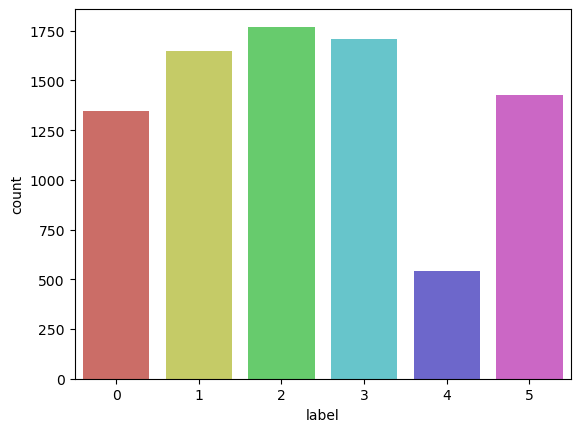

In [27]:
sns.countplot(x='label',data=df,palette='hls')

###### 0-barely true 
###### 2- false
###### 3-half true 
###### 4-mostly true 
###### 5-pants on fire

In [28]:
print(df.groupby(['subject'])['text'].count())

subject
Alcohol                                1
Alcohol,animals,children,crime         1
Alcohol,candidates-biography,crime     1
Alcohol,children                       1
Alcohol,children,drugs,marijuana       1
                                      ..
weather                                5
welfare                                8
women                                  5
women,workers                          1
workers                               10
Name: text, Length: 3195, dtype: int64


In [29]:
final_df=df.drop(columns=['subject','speaker job title','state info','party offiliation','barely true','false','half true','mostly true','pants on fire'])

In [30]:
final_df.head(1)

,label,text,speaker,context
0,1,Says the Annies List political group supports ...,dwayne-bohac,a mailer


In [31]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load the English stopwords and convert to a set
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imagicahealth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
from nltk.stem import PorterStemmer
import re
stemmer = PorterStemmer()

In [33]:
def stemming(statement):
    # Remove non-alphabet characters
    stemmed_content = re.sub('[^a-zA-Z]', ' ', statement)
    # Convert to lowercase
    stemmed_content = stemmed_content.lower()
    # Split the text into words
    stemmed_words = stemmed_content.split()
    # Apply stemming and remove stopwords
    stemmed_words = [stemmer.stem(word) for word in stemmed_words if word not in stopwords.words('english')]
    # Join the stemmed words
    stemmed_content = " ".join(stemmed_words)
    return stemmed_content

In [34]:
final_df.head(1)

,label,text,speaker,context
0,1,Says the Annies List political group supports ...,dwayne-bohac,a mailer


In [35]:
final_df['text']=final_df['text'].apply(stemming)

In [36]:
final_df['text']

0       say anni list polit group support third trimes...
1       declin coal start start natur ga took start be...
2       hillari clinton agre john mccain vote give geo...
5       chicago bear start quarterback last year total...
7       person stage work activ last year pass along r...
                              ...                        
1276        say u rep charl bass want privat social secur
1278    past two year democrat spent money countri spe...
1279    first time decad import account less half oil ...
1280    say donald trump bankrupt compani twice four time
1283    one claim report vindic new jersey gov chri ch...
Name: text, Length: 8438, dtype: object

In [37]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8438 entries, 0 to 1283
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    8438 non-null   int32 
 1   text     8438 non-null   object
 2   speaker  8438 non-null   object
 3   context  8438 non-null   object
dtypes: int32(1), object(3)
memory usage: 296.6+ KB


In [38]:
independant_df=final_df.iloc[:,1]
dependant_df=final_df.iloc[:,0]

In [39]:
independant_df.head(1)

0    say anni list polit group support third trimes...
Name: text, dtype: object

In [40]:
dependant_df.head()

0    1
1    2
2    3
5    5
7    2
Name: label, dtype: int32

In [41]:
X_train, X_test, y_train, y_test = train_test_split(independant_df, dependant_df, test_size=0.2, random_state=42)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_tf = vectorizer.fit_transform(X_train)
X_test_tf = vectorizer.transform(X_test)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tf)
X_test_scaled = scaler.transform(X_test_tf)

In [56]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_tf, y_train)
y_pred = classifier.predict(X_test_tf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.24644549763033174


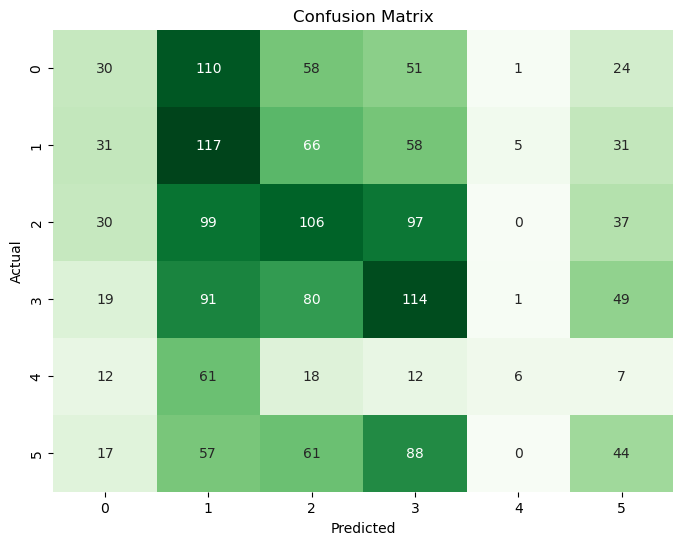

In [53]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier()
classifier.fit(X_train_tf, y_train)
y_pred = classifier.predict(X_test_tf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.19549763033175355


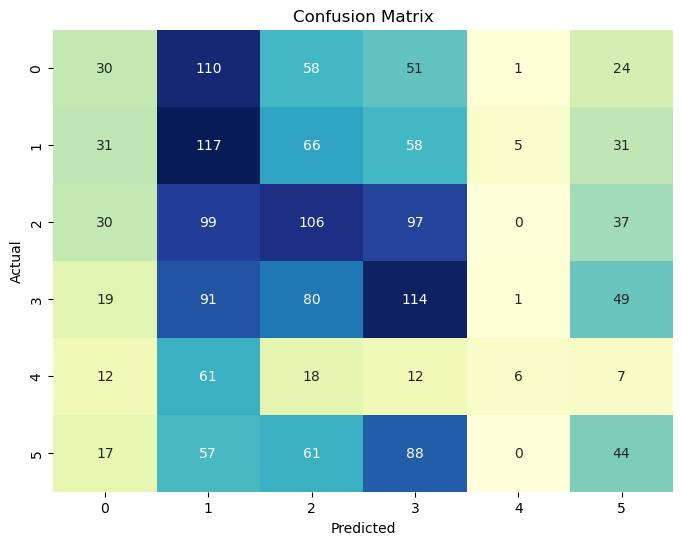

In [54]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [48]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.24703791469194314


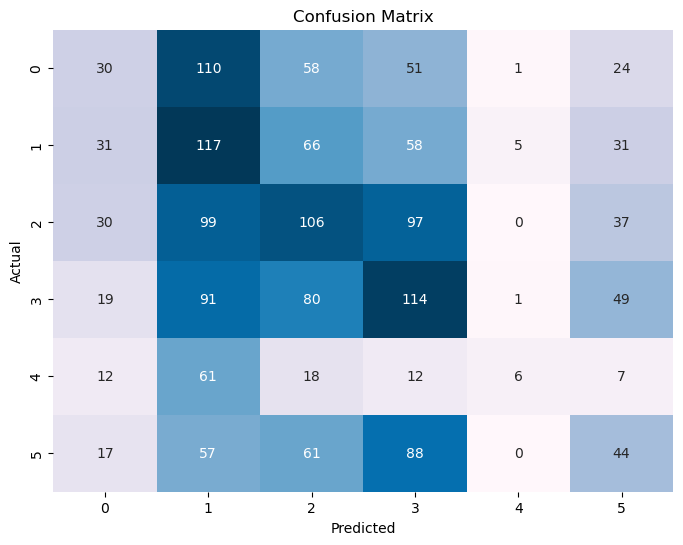

In [55]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="PuBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [62]:
def news_detect(news):
    # Create input DataFrame
    input_data = {'text': [news]}  # Wrap the news in a list to create a DataFrame
    input_df = pd.DataFrame(input_data)

    # Apply stemming to the input text
    input_df['text'] = input_df['text'].apply(stemming)

    # Preprocess the text using the same vectorizer
    input_text = input_df['text']
    vectorized_input = vectorizer.transform(input_text)

    # Predict using the trained classifier
    predictions = classifier.predict(vectorized_input)

    # Map predictions to labels
    label_mapping = {
        0: 'barely true',
        1: 'false',
        2: 'half true',
        3: 'mostly true',
        4: 'pants on fire',
        5: 'True'
    }
    
    predicted_labels = [label_mapping[pred] for pred in predictions]
    
    for prediction in predicted_labels:
        print(prediction)

In [63]:
news = "Says the Annies List political group supports third-trimester abortions on demand."
news_detect(news)

false
